# Importing Some Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import pickle

C:\Users\yadav\AppData\Roaming\Python\Python39\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Read Dataset 

In [2]:
df = pd.read_csv("E:\Tushar Programs\ML_Project\ML_Dengue_Cases\Data From Database\dengue_features_train.csv")
df1 = pd.read_csv("E:\Tushar Programs\ML_Project\ML_Dengue_Cases\Data From Database\dengue_labels_train.csv")
df_test = pd.read_csv("E:\Tushar Programs\ML_Project\ML_Dengue_Cases\Data From Database\dengue_features_test.csv")

In [3]:
df["total_cases"] = df1['total_cases']

In [4]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [5]:
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


# Replacing City Values

In [6]:
df["city"] = df["city"].replace(["sj", "iq"],[0,1])
df_test.replace({"sj": 0, "iq": 1}, inplace= True)

# Correlation Between Features

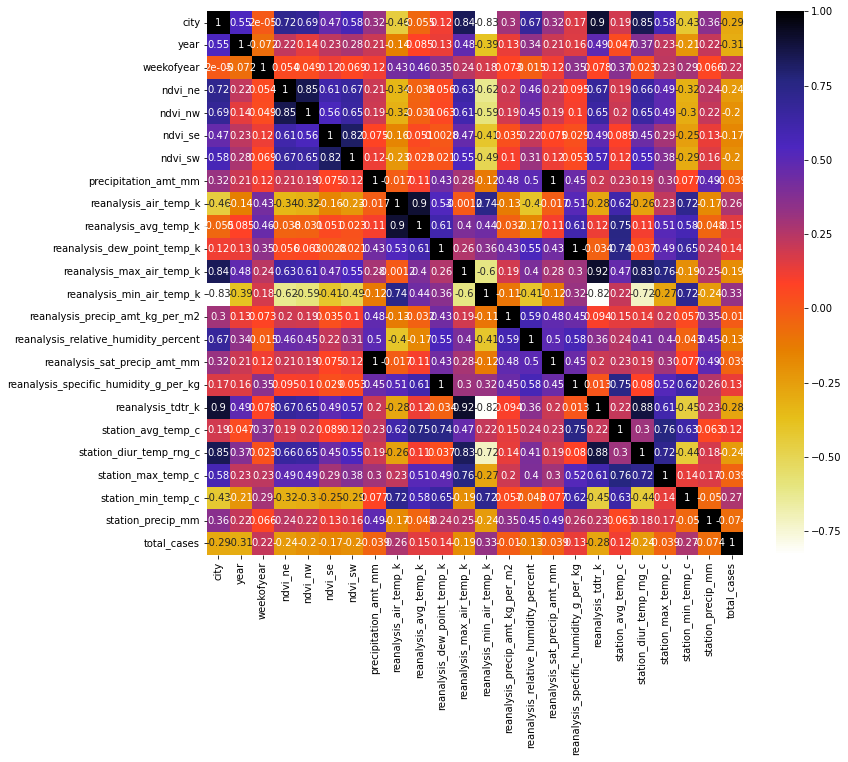

In [7]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap = plt.cm.CMRmap_r)
plt.show()

In [8]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:    #to take -ve correlated value use abs()
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [9]:
corr_features = correlation(df, .7)
corr_features

{'ndvi_ne',
 'ndvi_nw',
 'ndvi_sw',
 'reanalysis_avg_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c'}

In [10]:
df.drop(columns=list(corr_features),inplace = True)
df_test.drop(columns = list(corr_features), inplace=True)

df.drop(columns = ["week_start_date"], inplace = True)
df_test.drop(columns = ["week_start_date"], inplace= True)

# Handeling Null Values

In [11]:
df.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
ndvi_se                                 22
precipitation_amt_mm                    13
reanalysis_air_temp_k                   10
reanalysis_dew_point_temp_k             10
reanalysis_precip_amt_kg_per_m2         10
reanalysis_relative_humidity_percent    10
station_precip_mm                       22
total_cases                              0
dtype: int64

In [12]:
column = df.columns
m = 0
for i in df.isnull().sum():
    if i > 0:
        df[column[m]].fillna(df[column[m]].median(), inplace=True)
    m +=1

In [13]:
df_test.isnull().sum()

city                                    0
year                                    0
weekofyear                              0
ndvi_se                                 1
precipitation_amt_mm                    2
reanalysis_air_temp_k                   2
reanalysis_dew_point_temp_k             2
reanalysis_precip_amt_kg_per_m2         2
reanalysis_relative_humidity_percent    2
station_precip_mm                       5
dtype: int64

In [14]:
df_test.fillna(df_test.mean(), inplace=True)

# Standard Scaling

In [15]:
df_new = df.drop(columns = ['total_cases'])

In [16]:
standard_scale = StandardScaler()
result = standard_scale.fit_transform(df_new)

In [17]:
test_result = standard_scale.transform(df_test)

In [18]:
df_scale = pd.DataFrame(result,columns=df.drop(columns = ["total_cases"]).columns)

In [19]:
df_test_scale = pd.DataFrame(result,columns=df_test.columns)

In [20]:
df_scale["total_cases"] = df["total_cases"]

# VIF Score Of Features

In [21]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df_scale.values, i) for i in range(df_scale.shape[1])]
vif['variable'] = df_scale.columns
print(vif)


           VIF                              variable
0    10.445201                                  city
1     1.572634                                  year
2     1.384320                            weekofyear
3     1.344512                               ndvi_se
4     1.681990                  precipitation_amt_mm
5   169.634573                 reanalysis_air_temp_k
6   226.894205           reanalysis_dew_point_temp_k
7     1.768293       reanalysis_precip_amt_kg_per_m2
8   241.998702  reanalysis_relative_humidity_percent
9     1.437323                     station_precip_mm
10    1.152410                           total_cases


In [22]:
df_scale.drop(columns = ["reanalysis_relative_humidity_percent", "reanalysis_relative_humidity_percent","reanalysis_air_temp_k"], inplace = True)
df_test_scale.drop(columns = ["reanalysis_relative_humidity_percent", "reanalysis_relative_humidity_percent","reanalysis_air_temp_k"], inplace = True)

# Outliers Handling

In [23]:
df_new = df_scale
df_new

,city,year,weekofyear,ndvi_se,precipitation_amt_mm,reanalysis_dew_point_temp_k,reanalysis_precip_amt_kg_per_m2,station_precip_mm,total_cases
0,-0.745356,-2.040448,-0.566356,-0.070729,-0.764739,-1.862076,-0.186289,-0.490112,4
1,-0.745356,-2.040448,-0.499753,-0.563717,-0.525716,-0.852376,-0.511127,-0.647168,5
2,-0.745356,-2.040448,-0.433150,-0.634092,-0.256355,0.121666,-0.322601,0.048974,4
3,-0.745356,-2.040448,-0.366547,0.326020,-0.697169,0.040026,-0.604466,-0.744798,3
4,-0.745356,-2.040448,-0.299943,0.648657,-0.877355,0.375967,-0.643742,-0.706595,6
...,...,...,...,...,...,...,...,...,...
1451,1.341641,1.658833,-0.366547,0.718838,0.220771,1.035650,0.114059,-0.256649,5
1452,1.341641,1.658833,-0.299943,-0.922807,0.937151,0.790732,3.859166,-0.052901,8
1453,1.341641,1.658833,-0.233340,0.637155,0.304429,0.165770,0.243440,-0.672637,1
1454,1.341641,1.658833,-0.166737,1.026463,0.321207,0.049410,0.514446,-0.490112,1


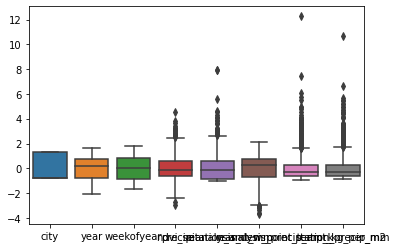

<Figure size 2880x5760 with 0 Axes>

In [24]:
fig,ax = plt.subplots()
plt.figure(figsize=(40,80))
sns.boxplot(data = df_new.drop(columns = "total_cases"), ax = ax)
plt.show()

In [25]:
q = df_new[df_new.columns[7]].quantile(.94)
df_new = df_new[df_new[df_new.columns[7]]<q]

q = df_new[df_new.columns[6]].quantile(.95)
df_new = df_new[df_new[df_new.columns[6]]<q]

q = df_new[df_new.columns[4]].quantile(.98)
df_new = df_new[df_new[df_new.columns[4]]<q]

q = df_new[df_new.columns[3]].quantile(.98)
df_new = df_new[df_new[df_new.columns[3]]<q]


In [26]:
q = df_new[df_new.columns[5]].quantile(.99)
df_new = df_new[df_new[df_new.columns[5]]> -q]

q = df_new[df_new.columns[3]].quantile(.99)
df_new = df_new[df_new[df_new.columns[3]]> -q]

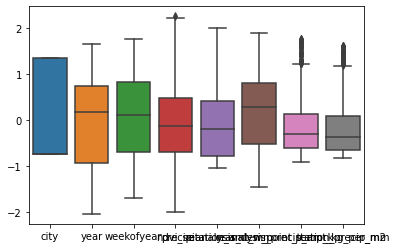

<Figure size 2880x5760 with 0 Axes>

In [27]:
fig,ax = plt.subplots()
plt.figure(figsize=(40,80))
sns.boxplot(data = df_new.drop(columns = "total_cases"), ax = ax)
plt.show()

In [28]:
df_new.shape

(1102, 9)

# Separating Dependent & Independent Features

In [29]:
x = df_new.drop(columns = ["total_cases"])

In [30]:
x

,city,year,weekofyear,ndvi_se,precipitation_amt_mm,reanalysis_dew_point_temp_k,reanalysis_precip_amt_kg_per_m2,station_precip_mm
1,-0.745356,-2.040448,-0.499753,-0.563717,-0.525716,-0.852376,-0.511127,-0.647168
2,-0.745356,-2.040448,-0.433150,-0.634092,-0.256355,0.121666,-0.322601,0.048974
3,-0.745356,-2.040448,-0.366547,0.326020,-0.697169,0.040026,-0.604466,-0.744798
4,-0.745356,-2.040448,-0.299943,0.648657,-0.877355,0.375967,-0.643742,-0.706595
5,-0.745356,-2.040448,-0.233340,0.691156,-0.830010,0.395673,-0.313590,0.000159
...,...,...,...,...,...,...,...,...
1450,1.341641,1.658833,-0.433150,0.745155,-1.023757,-1.328136,-0.722294,-0.776633
1451,1.341641,1.658833,-0.366547,0.718838,0.220771,1.035650,0.114059,-0.256649
1453,1.341641,1.658833,-0.233340,0.637155,0.304429,0.165770,0.243440,-0.672637
1454,1.341641,1.658833,-0.166737,1.026463,0.321207,0.049410,0.514446,-0.490112


In [31]:
y = df_new["total_cases"]

# train and test split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=.1, random_state=495)

In [33]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [34]:
model.feature_importances_

array([0.06042641, 0.39152176, 0.23510307, 0.06865835, 0.03328201,
       0.10624242, 0.04799092, 0.05677506])

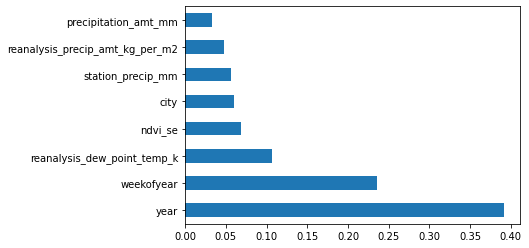

In [35]:
feat_importance = pd.Series(model.feature_importances_, index= x.columns)
feat_importance.nlargest(30).plot(kind = "barh")
plt.show()

# Selecting best random state

In [36]:
"""r = 500
l = []
for i in range(500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.13, random_state=i)
    xgb_model1 = xgb.XGBRFRegressor()
    xgb_model1.fit(x_train, y_train)
    test = xgb_model1.score(x_test, y_test)
    train = xgb_model1.score(x_train, y_train)
    if test > .7:
        l.append([test, train, i])"""

'r = 500\nl = []\nfor i in range(500):\n    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.13, random_state=i)\n    xgb_model1 = xgb.XGBRFRegressor()\n    xgb_model1.fit(x_train, y_train)\n    test = xgb_model1.score(x_test, y_test)\n    train = xgb_model1.score(x_train, y_train)\n    if test > .7:\n        l.append([test, train, i])'

In [37]:
"""for i in l:
    if i[0] > .88:
        print(i)"""

'for i in l:\n    if i[0] > .88:\n        print(i)'

# Model Building

# Linear Regression

In [38]:
linear = LinearRegression()

In [39]:
linear.fit(x_train, y_train)

LinearRegression()

In [40]:
linear.score(x_train, y_train)

0.1707716928385643

In [41]:
linear.score(x_test, y_test)

0.13195755287835476

# LassoCV 

In [42]:
lasscv=LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lasscv.fit(x_train,y_train)

C:\Users\yadav\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=100000, normalize=True)

In [43]:
#best alpha paramter
alpha=lasscv.alpha_
alpha

0.024611649690863022

In [44]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.024611649690863022)

In [45]:
lasso_reg.score(x_train,y_train)

0.1707670329402321

In [46]:
lasso_reg.score(x_test,y_test)

0.13206124260433916



# XGBoost Regression

In [47]:
xgb_model1 = xgb.XGBRFRegressor(n_estimators=155)

In [48]:
x_train

array([[-0.74535599,  0.36408443, -0.36654669, ..., -0.0425514 ,
        -0.60770015, -0.61533225],
       [-0.74535599,  0.54904846,  0.96551865, ...,  0.87706368,
        -0.10080536, -0.31183145],
       [-0.74535599, -1.855484  ,  0.49929578, ...,  0.87518691,
        -0.33715603, -0.79785721],
       ...,
       [-0.74535599, -0.00584364, -0.96597609, ..., -1.44731035,
        -0.8865616 , -0.56015029],
       [ 1.34164079,  0.17912039,  1.49834479, ...,  0.81231527,
         0.21109435,  0.14660333],
       [-0.74535599,  0.91897654,  1.69815459, ..., -0.37192374,
        -0.40577397, -0.43492968]])

In [49]:
xgb_model1.fit(x_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=155, n_jobs=8,
               num_parallel_tree=155, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [50]:
xgb_model1.score(x_train, y_train)

0.9086850577744452

In [51]:
xgb_model1.score(x_test, y_test)

0.8967824527067837

In [52]:
y_test_pred = xgb_model1.predict(x_test)

In [53]:
import sklearn.metrics as sm
import math
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 9.92
Mean squared error = 197.66
Median absolute error = 6.06
Explain variance score = 0.9
R2 score = 0.9


# RandomForest Regression

In [54]:
"""r = 500
l = []
for i in range(500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.13, random_state=i)
    xgb_model1 = RandomForestRegressor()
    xgb_model1.fit(x_train, y_train)
    test = xgb_model1.score(x_test, y_test)
    train = xgb_model1.score(x_train, y_train)
    if test > .7:
        l.append([test, train, i])"""

'r = 500\nl = []\nfor i in range(500):\n    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.13, random_state=i)\n    xgb_model1 = RandomForestRegressor()\n    xgb_model1.fit(x_train, y_train)\n    test = xgb_model1.score(x_test, y_test)\n    train = xgb_model1.score(x_train, y_train)\n    if test > .7:\n        l.append([test, train, i])'

In [55]:
"""for i in l:
    if i[0] > .88:
        print(i)"""

'for i in l:\n    if i[0] > .88:\n        print(i)'

In [56]:
rf_reg = RandomForestRegressor()

In [57]:
 rf_parameters ={'n_estimators': [100,200,300,400,500,600],
                       'max_features': ['auto', 'sqrt'],
                       'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4],
                       'bootstrap': [True, False]
                      }

In [58]:

random_rf = RandomizedSearchCV(estimator=rf_reg,
                                        param_distributions=rf_parameters,
                                        cv=5,
                                        scoring='neg_root_mean_squared_error',
                                        n_iter=10,
                                        n_jobs=-1,
                                        verbose=2,
                                        random_state=101
                                        )

In [59]:
random_rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\yadav\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   random_state=101, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [60]:
best_param = random_rf.best_params_
print(best_param)

{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': False}


In [61]:
rf_model = RandomForestRegressor(n_estimators = best_param["n_estimators"],
                                            min_samples_split = best_param['min_samples_split'],
                                            min_samples_leaf = best_param['min_samples_leaf'],
                                            max_features = best_param['max_features'],
                                            max_depth = best_param['max_depth'],
                                            bootstrap = best_param['bootstrap'])

In [62]:
rf_model.fit(x_train, y_train)

C:\Users\yadav\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(bootstrap=False, max_depth=50, max_features='auto',
                      min_samples_leaf=4, min_samples_split=10)

In [63]:
rf_model.score(x_train, y_train)

0.9242013772020763

In [64]:
rf_model.score(x_test, y_test)

0.862563342030186

In [65]:
y_test_pred = rf_model.predict(x_test)

In [66]:
import sklearn.metrics as sm
import math
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 9.62
Mean squared error = 263.19
Median absolute error = 5.38
Explain variance score = 0.86
R2 score = 0.86


# GradientBoosting Regression

In [67]:
gb_reg = GradientBoostingRegressor()

In [68]:
"""r = 500
l = []
for i in range(500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=i)
    xgb_model1 = GradientBoostingRegressor( )
    xgb_model1.fit(x_train, y_train)
    test = xgb_model1.score(x_test, y_test)
    train = xgb_model1.score(x_train, y_train)
    if test > .7:
        l.append([test, train, i])"""

'r = 500\nl = []\nfor i in range(500):\n    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=i)\n    xgb_model1 = GradientBoostingRegressor( )\n    xgb_model1.fit(x_train, y_train)\n    test = xgb_model1.score(x_test, y_test)\n    train = xgb_model1.score(x_train, y_train)\n    if test > .7:\n        l.append([test, train, i])'

In [69]:
"""for i in l:
    if i[0] > .87:
        print(i)"""

'for i in l:\n    if i[0] > .87:\n        print(i)'

In [70]:
gb_reg.fit(x_train,y_train)

GradientBoostingRegressor()

In [71]:
gb_reg.score(x_train,y_train)

0.8757032768593218

In [72]:
gb_reg.score(x_test,y_test)

0.8497385117748684

In [73]:
y_test_pred = gb_reg.predict(x_test)

In [74]:
import sklearn.metrics as sm
import math
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 10.48
Mean squared error = 287.75
Median absolute error = 6.32
Explain variance score = 0.85
R2 score = 0.85


## Save Model

In [ ]:
pickle.dump(xgb_model1, open("dengue_prediction_model.pkl", "wb"))

In [ ]:
pickle.dump(standard_scale, open("Standarscaler.pkl", "wb"))

## Test Dataset Prediction

In [75]:
test_pred = xgb_model1.predict(df_test_scale)

C:\Users\yadav\AppData\Roaming\Python\Python39\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [76]:
final = []
for i in test_pred:
    final.append(int(i))

In [79]:
df_result = pd.read_csv("E:\Tushar Programs\ML_Project\ML_Dengue_Cases\Data From Database\dengue_features_test.csv")

In [80]:
df_result["total_cases"] = pd.DataFrame(final)

In [81]:
df_result

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,18
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,17
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,...,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,17
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,16
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0,43
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0,44
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2,41
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1,41


In [82]:
df_final = pd.DataFrame()

In [83]:
df_final["city"] = df_result["city"]
df_final["year"] = df_result["year"]
df_final["weekofyear"] = df_result["weekofyear"]
df_final["total_cases"] = df_result["total_cases"]

In [84]:
df_final

,city,year,weekofyear,total_cases
0,sj,2008,18,18
1,sj,2008,19,17
2,sj,2008,20,17
3,sj,2008,21,16
4,sj,2008,22,16
...,...,...,...,...
411,iq,2013,22,43
412,iq,2013,23,44
413,iq,2013,24,41
414,iq,2013,25,41


In [ ]:
df_final.to_csv("dengue_labels_test.csv")

In [ ]:

from decimal import *
  
  
# getcontext().prec = 6
# print(Decimal("0.3") - Decimal("0.2"))
print(Decimal("0.3") - Decimal("0.2") - Decimal("0.1"))

0.1
0.0
